<a href="https://colab.research.google.com/github/stm010/dsci100/blob/main/dsci100_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**1. Prediction**

In the cell bellow you have presure data $p(t)$. Our goal is to develop a model to predict the presure in the future.

To do that we use the following model
$$ p_{t+1} = \sum_{j=t-9}^t \alpha_j p_j  + \beta $$

To find the coeficients, $\alpha$ we set up a system
$$
\begin{pmatrix}
p_{11} \\ p_{12} \\ . \\ . \\ p_{t+1}
\end{pmatrix} =
\begin{pmatrix}
p_1 & p_2 & ... & p_9 & p_{10} & 1 \\
p_2 & p_3 & ... & p_{10} & p_{11} & 1 \\
p_3 & p_4 & ... & p_{11} & p_{12} & 1 \\
 &  & ... &  & & 1 \\
p_{t-9} & p_{t-8} & ... & p_{t-1} & p_{t} & 1\\
\end{pmatrix}
\begin{pmatrix}
\alpha_1 \\ \alpha_2 \\ . \\ \alpha_{10} \\ \beta
\end{pmatrix}
$$

Given the data bellow
1. Write a code to setup the system
2. Solve for the coeficients $\alpha$
3. Use the coeficients to predict the data for 100 times into the future.
4. Plot the solution

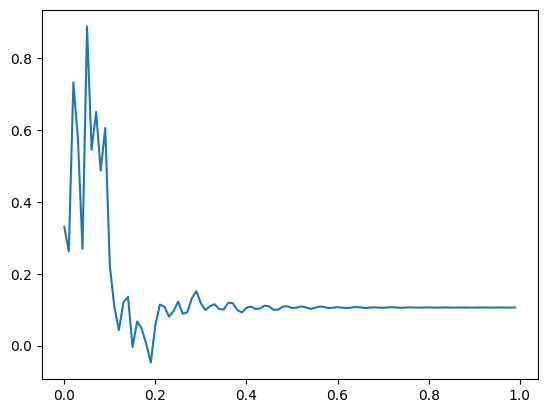

In [2]:
t = np.arange(0,100)/100
p = np.array([ 0.33090877,  0.26200726,  0.73240919,  0.5755925,   0.26938649,  0.88819377,
  0.54478869,  0.65007137,  0.48719793,  0.60582336,  0.22268034,  0.10718666,
  0.04281039,  0.12048089,  0.13548732, -0.00427034,  0.06699479,  0.04706714,
  0.00384723, -0.04713778,  0.05721163,  0.11396839,  0.10822917,  0.08052131,
  0.09598756,  0.12215222,  0.08854052,  0.09220313,  0.13106574,  0.1517277,
  0.11731335,  0.09891831,  0.10954892,  0.1148815,   0.10169037,  0.10025016,
  0.11929274,  0.11808384,  0.09857466,  0.09225846,  0.10496446,  0.10840926,
  0.10172416,  0.10321625,  0.11112522,  0.10871488,  0.09916005,  0.10030502,
  0.10847775,  0.10928544,  0.10447583,  0.10530773,  0.10869337,  0.10635962,
  0.10238675,  0.10444316,  0.10858449,  0.10751197,  0.10449062,  0.1051876,
  0.10693354,  0.10555881,  0.10406172,  0.10571539,  0.10742394,  0.10616904,
  0.10463082,  0.10543564,  0.1063975,   0.10562163,  0.10505788,  0.10603741,
  0.10660405,  0.1056747,   0.10506233,  0.10573826,  0.10619885,  0.10569168,
  0.10546339,  0.10598136,  0.10611526,  0.10556933,  0.10540543,  0.10586518,
  0.10602551,  0.10568951,  0.10560875,  0.10588774,  0.10589408, 0.10561376,
  0.10561597,  0.10587949,  0.1058961,   0.10568923,  0.10568165,  0.10583674,
  0.10581328,  0.10567684,  0.10571648,  0.10584806])
plt.plot(t, p)



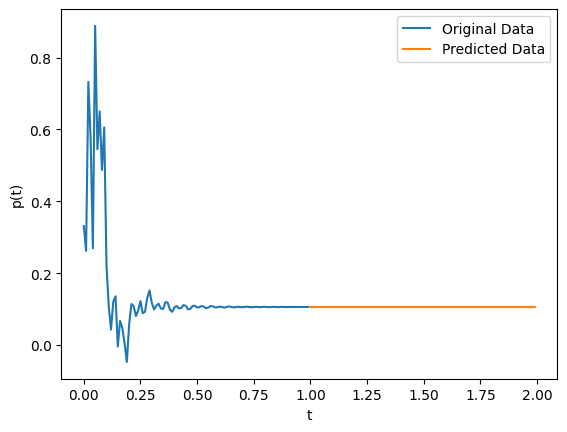

In [3]:
# YOUR CODE HERE

# 1. Setup the system
A = []
b = []
for i in range(10, len(p)):
    row = list(p[i - 10:i]) + [1]
    A.append(row)
    b.append(p[i])
A = np.array(A)
b = np.array(b)

# 2. Solve for coefficients
alpha = np.linalg.solve(A.T @ A, A.T @ b)

# 3. Predict future data
p_future = []
p_current = list(p[-10:])
for i in range(100):
    p_next = np.dot(alpha[:-1], p_current) + alpha[-1]
    p_future.append(p_next)
    p_current = p_current[1:] + [p_next]

# 4. Plot the solution
plt.plot(t, p, label='Original Data')
plt.plot(np.arange(1, 1.01 + 0.01 * (len(p_future) -1) ,0.01), p_future, label='Predicted Data')
plt.xlabel('t')
plt.ylabel('p(t)')
plt.legend()
plt.show()

**2. Global Prediction**

Use the model
$$ p(t)  = \exp(-\gamma_1 t)\cos(4\pi t) + \exp(-\gamma_2 t)\sin(4\pi t) $$

Estimate the parameters $\gamma_1$ and $\gamma_2$ using manual experimentation.

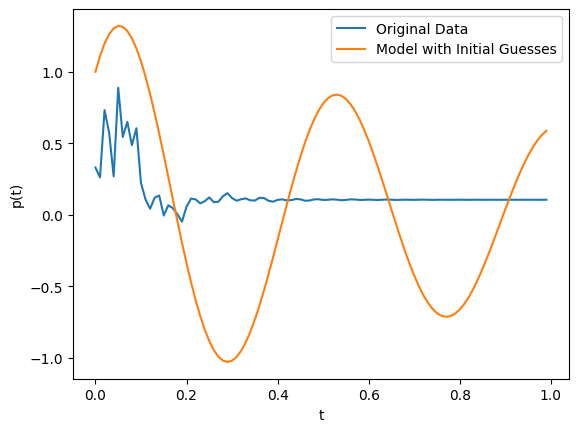

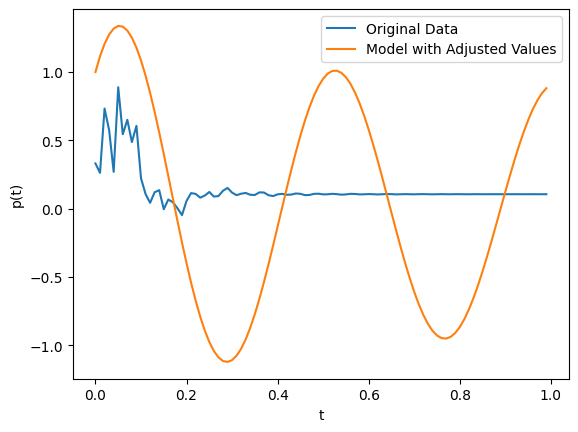

In [4]:
# YOUR CODE HERE

# Manual experimentation
gamma1 = 0.5  # Initial guess for gamma1
gamma2 = 2 # Initial guess for gamma2

# Define the model function
def p_model(t, gamma1, gamma2):
    return np.exp(-gamma1 * t) * np.cos(4 * np.pi * t) + np.exp(-gamma2 * t) * np.sin(4 * np.pi * t)

# Plot the original data and the model with initial guesses
plt.plot(t, p, label='Original Data')
plt.plot(t, p_model(t, gamma1, gamma2), label='Model with Initial Guesses')
plt.xlabel('t')
plt.ylabel('p(t)')
plt.legend()
plt.show()

# Adjust gamma1 and gamma2 manually until the model fits the data well
# ... (Experiment with different values) ...

# Final values after experimentation
gamma1 = 0.1  # Adjusted value for gamma1
gamma2 = 2  # Adjusted value for gamma2

# Plot the original data and the model with adjusted values
plt.plot(t, p, label='Original Data')
plt.plot(t, p_model(t, gamma1, gamma2), label='Model with Adjusted Values')
plt.xlabel('t')
plt.ylabel('p(t)')
plt.legend()
plt.show()

**3. Interpolation in 2D**

Bellow we observe the data X, Y, fobs.

1. Make the data np arrays
2. Use scatter to plot the data
3. Interpolate the data to a mesh between $[-3,3]^2$
4. Use cross validation to estimate the error of the interpolation



In [11]:
#X = [1.44336013e-01 -2.53209207e-01  6.23092581e-01  1.19221698e-01
#4.63695565e-02 -1.85739551e-01  3.08726405e-01 -5.83707996e-01
#-1.41231401e+00 -1.09283028e+00  1.67874094e-01 -3.44964825e-01
#-9.14445118e-01  4.53595226e-01  8.72910523e-01 -1.93043962e+00
#-4.95134238e-01  1.78827114e-01 -7.73270262e-01  2.08130692e-01
#6.84526615e-01 -4.19582841e-01 -5.69828307e-01  5.90529298e-01
#5.93690952e-02 -2.76891619e-01 -5.44141013e-01 -2.25251201e-01
#-3.02268188e-02 -9.62496065e-01 -1.02186947e+00  3.25392817e-01
#-2.50173723e-01 -1.69370167e+00  1.26087491e+00 -5.35281778e-02
#-1.33653237e+00  1.26110581e+00 -8.65257347e-01  1.01474830e+00
#1.94512866e-01  1.63424944e+00 -1.61977701e-01  1.84578986e-01
#-2.11577542e+00 -1.32839037e+00 -5.37226543e-01 -3.23661258e-01
#-2.73917595e-01  2.82419794e-02  1.55811024e+00 -3.72663960e-01
#6.14351261e-01 -4.31042967e-01  3.60334274e-01  1.69687486e+00
#-9.18695778e-01 -5.51621937e-01 -8.27927830e-01  5.47836956e-01
#-6.40870747e-01 -3.43658883e-01  1.70165975e+00 -6.89001927e-01
#-3.83100797e-01 -6.97667908e-01 -2.79244476e+00  2.86764827e-01
#4.73028471e-01 -2.74083956e-01 -6.29542198e-01 -1.88242418e+00
#-1.82378558e-01 -1.81876530e+00 -1.80452540e+00 -2.57796260e-01
#1.04879409e-01 -1.69405721e+00  1.47305202e-01 -1.70609887e+00
#1.15508390e+00 -2.05896496e+00  4.86119296e-02  1.52718326e-03
#-1.22724521e+00 -6.27017819e-01 -5.43178578e-01 -3.01553584e-01
#-7.11246962e-01 -1.33921571e+00  3.78325582e-01  4.58234250e-01
#-3.56778826e-01 -1.22726954e-01 -9.91774226e-02 -1.35781765e+00
#7.79708646e-01 -3.24652757e-02 -7.59302050e-01 -1.51480360e-01]

import re
import numpy as np

markdown_string_x = """#X = [1.44336013e-01 -2.53209207e-01  6.23092581e-01  1.19221698e-01
4.63695565e-02 -1.85739551e-01  3.08726405e-01 -5.83707996e-01
#-1.41231401e+00 -1.09283028e+00  1.67874094e-01 -3.44964825e-01
#-9.14445118e-01  4.53595226e-01  8.72910523e-01 -1.93043962e+00
#-4.95134238e-01  1.78827114e-01 -7.73270262e-01  2.08130692e-01
#6.84526615e-01 -4.19582841e-01 -5.69828307e-01  5.90529298e-01
#5.93690952e-02 -2.76891619e-01 -5.44141013e-01 -2.25251201e-01
#-3.02268188e-02 -9.62496065e-01 -1.02186947e+00  3.25392817e-01
#-2.50173723e-01 -1.69370167e+00  1.26087491e+00 -5.35281778e-02
#-1.33653237e+00  1.26110581e+00 -8.65257347e-01  1.01474830e+00
#1.94512866e-01  1.63424944e+00 -1.61977701e-01  1.84578986e-01
#-2.11577542e+00 -1.32839037e+00 -5.37226543e-01 -3.23661258e-01
#-2.73917595e-01  2.82419794e-02  1.55811024e+00 -3.72663960e-01
#6.14351261e-01 -4.31042967e-01  3.60334274e-01  1.69687486e+00
#-9.18695778e-01 -5.51621937e-01 -8.27927830e-01  5.47836956e-01
#-6.40870747e-01 -3.43658883e-01  1.70165975e+00 -6.89001927e-01
#-3.83100797e-01 -6.97667908e-01 -2.79244476e+00  2.86764827e-01
#4.73028471e-01 -2.74083956e-01 -6.29542198e-01 -1.88242418e+00
#-1.82378558e-01 -1.81876530e+00 -1.80452540e+00 -2.57796260e-01
#1.04879409e-01 -1.69405721e+00  1.47305202e-01 -1.70609887e+00
#1.15508390e+00 -2.05896496e+00  4.86119296e-02  1.52718326e-03
#-1.22724521e+00 -6.27017819e-01 -5.43178578e-01 -3.01553584e-01
#-7.11246962e-01 -1.33921571e+00  3.78325582e-01  4.58234250e-01
#-3.56778826e-01 -1.22726954e-01 -9.91774226e-02 -1.35781765e+00
#7.79708646e-01 -3.24652757e-02 -7.59302050e-01 -1.51480360e-01]"""


# Extract the numbers using regular expressions
numbers_strx = re.findall(r"[-+]?\d*\.\d+e[-+]?\d+|[-+]?\d*\.\d+", markdown_string_x)

# Convert the extracted numbers to a NumPy array
X = np.array(numbers_strx, dtype=float)

print(X)

markdown_string_y = """#Y = [-0.43063805  1.12827207 -0.21098442 -0.12612389 -0.17625128  0.21499593
# 2.3666882  -0.37230418  1.49684675  0.17236811  2.5784592   0.14925367
#-0.20106192 -1.51078852  0.69078219  0.06075484 -1.27026773  0.84844707
# 0.66391339 -1.55746869 -0.43088978  0.59797653 -0.20570954  0.82747515
#-1.76334325 -0.00509793 -0.94968049  0.10828525  0.47455941 -0.53104677
# 0.55243616 -0.30753056  0.42207279 -0.16861868 -0.17000389  1.34612251
#-1.63756634 -0.08404369  0.32953857  1.18409375 -0.2849008   0.79280645
#-1.0471768  -0.65517455  0.85085536 -0.53685305  0.02564778  0.50771369
#-1.87061338 -0.09309289  0.5941341  -0.43135041  1.089712    0.55054669
#-0.25962592 -1.78826144 -1.86476287 -0.32677564 -0.30026508 -0.07524408
# 2.22813022  1.3957944  -1.05546688  1.89809314 -0.89170928  0.87414253
# 0.38317293 -1.40181034 -1.30756147  0.76014346 -0.71326829 -0.56356631
# -1.80192799  1.21918521  0.425774    1.16207417 -0.77067734 -0.73224286
# 0.71942371 -0.46682224 -1.18920782 -1.02056758  0.98036933  0.82222258
# -0.58385325  0.77064676 -1.18254236 -0.10098567  0.84888862  0.83101872
# 0.18043092  0.93080015  0.36634019 -0.84245687 -0.00644094  1.89570611
# -0.02433675  0.61876086 -0.57568255  0.61293205]"""

# Extract the numbers using regular expressions
numbers_stry = re.findall(r"[-+]?\d*\.\d+e[-+]?\d+|[-+]?\d*\.\d+", markdown_string_y)

# Convert the extracted numbers to a NumPy array
Y = np.array(numbers_stry, dtype=float)

print(Y)


markdown_string_F = """#Fobs = [ 1.05308184  4.73234413  0.857142    0.9116495   1.20331376  0.94943202
#  2.57529114  2.59238518  0.7108884  -2.38212956  1.44338905  1.32223056
# -0.31534732 -5.91233412  1.80837239 -1.84254123 -0.21198098  2.08259048
# -0.46988437 -6.46336837  0.85358877  0.86838454  2.10175132  1.81866811
# -6.09202222  1.77711846  2.83821314  1.32008925  0.47604652  1.14839561
# -2.02684416  0.49072775  0.7904788  -2.20477002  3.46773681  7.32251961
#  0.16840472  3.53866748 -1.40715779  2.86788312  0.96722767  1.6553258
# -0.03422864  0.70366248 -0.52725606 -0.75020937  1.34324838  0.54794079
# -4.29472892  1.13452432  2.20075461  3.44497662  3.4436259   0.64495723
#  0.26281534 -0.21118116 -0.66253621  2.69190323  1.20447194  0.52523702
#  2.52036892  6.59681103  0.73691275  4.19363931  2.65597839  1.03087318
#  0.04795419 -5.71416842 -4.9408801   1.52076203  3.48847778 -0.73475338
# -4.93288376 -0.34315959 -1.58532114  5.41513278  0.60416747 -0.58877311
#  0.94337072 -1.19223022 -0.57356988 -0.14421641  3.60978005  1.87872189
# -0.10845687  0.71749843  0.75451982  2.23585117  0.81947811 -1.41996826
# -0.15990513  2.25637011  0.87308469  1.67588311  1.40891284  0.9810649
#  1.7719347   0.81692297  2.82335491  0.68386102]"""

# Extract the numbers using regular expressions
numbers_strF = re.findall(r"[-+]?\d*\.\d+e[-+]?\d+|[-+]?\d*\.\d+", markdown_string_F)

# Convert the extracted numbers to a NumPy array
Fobs = np.array(numbers_strF, dtype=float)

print(Y)

[ 1.44336013e-01 -2.53209207e-01  6.23092581e-01  1.19221698e-01
  4.63695565e-02 -1.85739551e-01  3.08726405e-01 -5.83707996e-01
 -1.41231401e+00 -1.09283028e+00  1.67874094e-01 -3.44964825e-01
 -9.14445118e-01  4.53595226e-01  8.72910523e-01 -1.93043962e+00
 -4.95134238e-01  1.78827114e-01 -7.73270262e-01  2.08130692e-01
  6.84526615e-01 -4.19582841e-01 -5.69828307e-01  5.90529298e-01
  5.93690952e-02 -2.76891619e-01 -5.44141013e-01 -2.25251201e-01
 -3.02268188e-02 -9.62496065e-01 -1.02186947e+00  3.25392817e-01
 -2.50173723e-01 -1.69370167e+00  1.26087491e+00 -5.35281778e-02
 -1.33653237e+00  1.26110581e+00 -8.65257347e-01  1.01474830e+00
  1.94512866e-01  1.63424944e+00 -1.61977701e-01  1.84578986e-01
 -2.11577542e+00 -1.32839037e+00 -5.37226543e-01 -3.23661258e-01
 -2.73917595e-01  2.82419794e-02  1.55811024e+00 -3.72663960e-01
  6.14351261e-01 -4.31042967e-01  3.60334274e-01  1.69687486e+00
 -9.18695778e-01 -5.51621937e-01 -8.27927830e-01  5.47836956e-01
 -6.40870747e-01 -3.43658

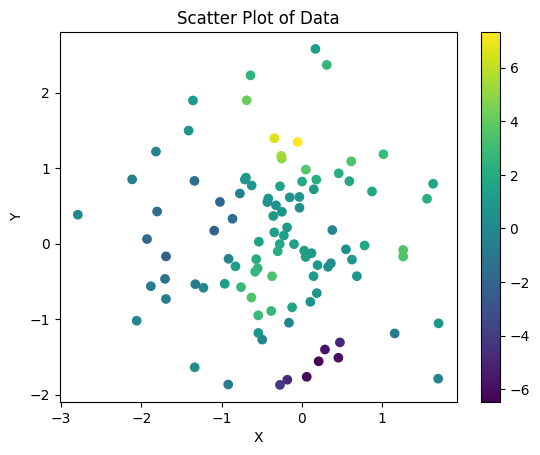

Interpolation Error (MSE): nan


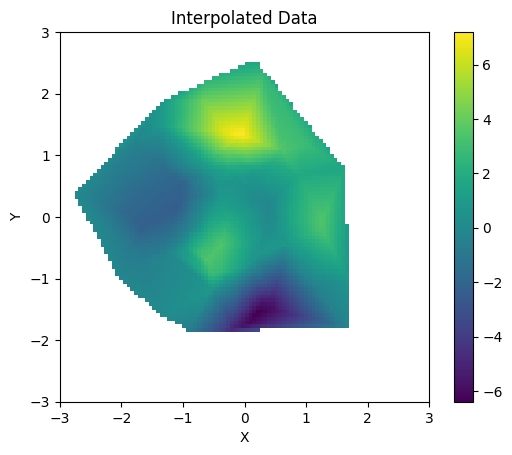

In [14]:
#Your Code Here
from scipy.interpolate import griddata
from sklearn.model_selection import train_test_split


# 1. Make data into numpy arrays
X = np.array(X)
Y = np.array(Y)
Fobs = np.array(Fobs)

# 2. Scatter plot
plt.scatter(X, Y, c=Fobs)
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Data')
plt.show()

# 3. Interpolate data to a mesh
grid_x, grid_y = np.mgrid[-3:3:100j, -3:3:100j]
grid_z = griddata((X, Y), Fobs, (grid_x, grid_y), method='linear')

# 4. Cross-validation to estimate error
X_train, X_test, Y_train, Y_test, Fobs_train, Fobs_test = train_test_split(
    X, Y, Fobs, test_size=0.2, random_state=42
)

grid_z_train = griddata((X_train, Y_train), Fobs_train, (grid_x, grid_y), method='linear')
predicted_Fobs_test = griddata((X_train, Y_train), Fobs_train, (X_test, Y_test), method='linear')

error = np.mean((predicted_Fobs_test - Fobs_test)**2)
print(f"Interpolation Error (MSE): {error}")

# Plot interpolated data
plt.imshow(grid_z.T, extent=(-3, 3, -3, 3), origin='lower')
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Interpolated Data')
plt.show()


**4. Classification**

Given the data bellow
1. Make it into numpy
2. The data represents values X and Y and their class, c.
3. Use scatter to plot the data.
4. Using the data, X, Y, c find the class of the new points Xnew and Ynew given bellow


In [28]:
mdx = '''#X = [ 0.44831854  2.99311699  2.12797813  0.61952454 -0.36374999  0.9890991
#  0.37052904 -0.01878786  0.06010402  1.33618742  2.80431527 -0.41416707
#  0.7363936   2.08375468  0.92084967  0.94286136  1.34575854  0.90161783
# -0.10290178  2.07576059  1.50497151  0.94001479  3.30129569  0.92104947
#  1.10351548  1.89280347  1.96027549  1.23830758  0.90251325 -0.4413487
#  0.72746934  1.264336   -0.63890617  0.04430932  1.66150397  1.07195451
#  2.16708925  2.0574897   1.26489313  1.89703456  1.91182921  3.18726973
#  1.28689668  2.40866707  0.8113693   1.0979882  -0.81175882  1.55793641
#  1.30531591  2.62556047  1.0021843   0.47047053 -0.22725842 -1.04302756
# -0.5246675   0.22988187 -0.0436027   0.52346771  0.15968624  0.53358301
# -1.1314563  -0.96919557 -2.57113664 -0.66912713 -1.08237698 -0.77210732
#  0.20930623 -1.98371846  1.24287598  0.66421537 -0.78965562 -1.06772933
#  0.78663216  0.92006241 -0.91010027 -1.30145541  1.00690937 -0.65825817
#  0.99422712  0.24334474  1.03204485 -0.25740919 -0.03219583  0.45888976
# -0.19236879  1.36936672 -1.13443059 -0.8265857   1.27857099 -0.1771852
#  0.75223925  0.37626826  0.89575331  0.13916659  0.09971692  0.52628839
#  0.60970671  1.24648912 -1.9197425  -0.77757469]'''

numbers_x = re.findall(r"[-+]?\d*\.\d+e[-+]?\d+|[-+]?\d*\.\d+", mdx)
X1 = np.array(numbers_x, dtype=float)
#print(X1)

mdy = '''#Y = [ 7.80033832e-01  2.44849508e+00  2.25725699e+00  2.21931237e-01
#  2.37114255e+00  1.23348547e+00 -3.40310531e-01  2.31702691e+00
#  1.64636052e+00  1.24451495e+00  1.08274291e+00 -5.51232280e-01
#  2.22189204e+00  2.14432866e+00 -4.71390804e-01  2.58282028e+00
#  9.42825610e-01  1.26549454e+00  3.81331492e-01  8.63670653e-01
#  1.75079239e+00  1.56098649e+00  8.81365617e-01  1.89940758e+00
#  3.68454663e+00 -5.11415732e-01  9.22035958e-01  1.10664210e+00
#  1.42962235e+00  1.54391553e-01  9.08000923e-01  8.76061276e-01
#  1.15737779e+00  2.06734384e+00  5.99603840e-01  2.22150898e+00
#  1.09406425e+00  1.89228829e+00  6.84025876e-01 -2.17904412e+00
# -2.80041090e+00  7.47232763e-01  2.38525129e-01  1.78819897e+00
#  1.29506123e-01  3.16224271e+00  3.22379119e+00  2.33223282e+00
# -2.71975560e-01  7.54222936e-01 -1.51105222e+00  4.50228730e-01
# -2.11471944e-01  6.33525357e-01  1.05636554e+00  1.33617930e-01
# -5.41746364e-01 -1.91084091e-01 -1.55351902e+00 -1.64363752e+00
#  9.96523080e-01 -1.96054908e+00 -1.13536402e-01 -1.77624817e-01
#  4.05061560e-01  2.35501286e+00 -1.12445062e+00 -7.19423545e-01
#  4.37174266e-02  2.32779725e+00  1.16919342e+00  1.37205397e+00
#  1.28238723e+00 -7.07847465e-02  5.42281875e-01  7.39102599e-02
#  5.32300027e-01  2.83369747e-01  1.25597868e+00  6.02070876e-01
#  7.13537528e-01  1.08922907e+00 -1.12521642e+00  8.13046416e-01
#  2.94154341e-02  5.74746046e-01  3.61501237e-02  1.11912270e+00
# -3.41808293e-01 -7.60253194e-01 -1.59616947e-01  4.10423201e-01
# -1.93940830e+00 -2.98182810e-03  1.95765751e+00  1.44063910e-01
# -7.57522483e-01  1.16488077e+00  1.34945332e+00 -9.47910515e-02]'''

numbers_y = re.findall(r"[-+]?\d*\.\d+e[-+]?\d+|[-+]?\d*\.\d+", mdy)
Y1 = np.array(numbers_y, dtype=float)
#print(Y1)

mdc = '''#c = [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
# -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
# -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.
#  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
#  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
#  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]'''

numbers_c = re.findall(r"[-+]?\d*\.\d+|[-+]?\d+", mdc)
c = np.array(numbers_c, dtype=float)
#print(c)


mdxnew = '''#Xnew = [-0.48695995  1.19962657  0.23905787  0.08586642  1.1640901   2.08887516
#-0.92070472 -0.26965341 -0.34344455 -0.67282965 -0.39292552  0.25149779
# -0.90142223  1.77297987 -1.57973811  0.84789244  1.1267482   1.311162
# -0.42002605  0.30739398  0.84465251  1.47971846 -1.27915831 -0.59375032
#  0.64027686 -0.82317358 -1.50534507 -0.37087703  1.45142987 -1.63432775]'''

numbers_xnew = re.findall(r"[-+]?\d*\.\d+e[-+]?\d+|[-+]?\d*\.\d+", mdxnew)
Xnew = np.array(numbers_xnew, dtype=float)
#print(Xnew)

mdynew = '''#Ynew = [ 0.4935612  -1.15421293  0.9000393   0.71895641 -0.78260305  1.81935404
#0.14682733  1.72165793 -0.33681325 -0.88202751  0.15371223  2.06406153
# -1.68983916 -0.86254429 -0.81265134 -0.48345877 -0.5684543  -0.13874909
# -1.46665595 -1.26415946  0.46199021 -0.11021201 -1.47147281  0.78219191
#  0.44037018  0.53237699 -0.02032328  0.95858398  0.13954092  0.13847843]'''

numbers_ynew = re.findall(r"[-+]?\d*\.\d+e[-+]?\d+|[-+]?\d*\.\d+", mdynew)
Ynew = np.array(numbers_ynew, dtype=float)
#print(Ynew)

print("X1 shape:", X1.shape)
print("Y1 shape:", Y1.shape)
print("c shape:", c.shape)
print("Xnew shape:", Xnew.shape)
print("Ynew shape:", Ynew.shape)

X1 shape: (100,)
Y1 shape: (100,)
c shape: (100,)
Xnew shape: (30,)
Ynew shape: (30,)


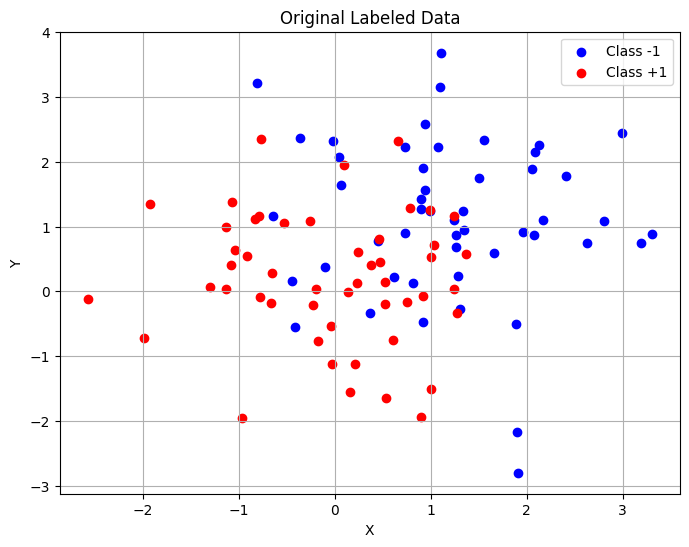

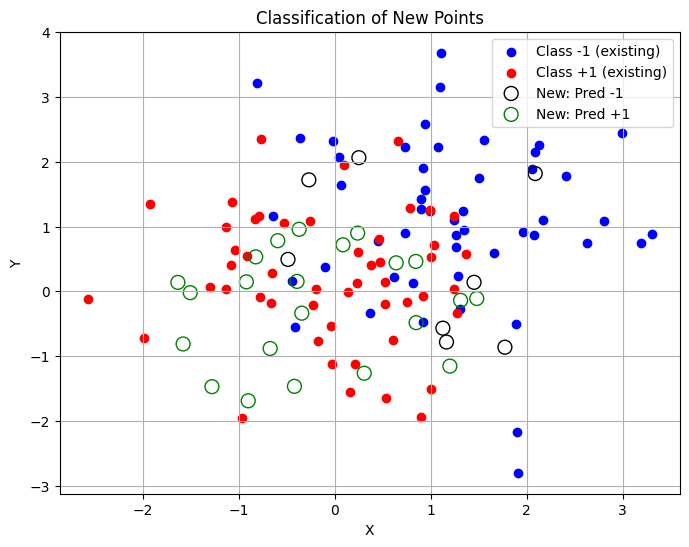

Predicted classes for new points: [-1.  1.  1.  1. -1. -1.  1. -1.  1.  1.  1. -1.  1. -1.  1.  1. -1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.]


In [29]:
# Your Code Here

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Convert data to numpy arrays
X1 = np.array(X1)  # Paste the full X list here
Y1 = np.array(Y1)  # Paste the full Y list here
c = np.array(c)  # Paste the full class labels here (-1 or 1)

Xnew = np.array(Xnew)  # Paste Xnew values here
Ynew = np.array(Ynew)  # Paste Ynew values here

# Combine X and Y into coordinate features
XY = np.vstack((X1, Y1)).T
XYnew = np.vstack((Xnew, Ynew)).T

# Combine X1 and Y1 into (x, y) features
XY = np.vstack((X1, Y1)).T  # shape: (n_samples, 2)
labels = c  # class labels (-1 or +1)

# Combine new points
XYnew = np.vstack((Xnew, Ynew)).T  # shape: (n_new, 2)

# Scatter plot of original labeled data
plt.figure(figsize=(8, 6))
plt.scatter(X1[c==-1], Y1[c==-1], color='blue', label='Class -1')
plt.scatter(X1[c==1], Y1[c==1], color='red', label='Class +1')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Original Labeled Data")
plt.legend()
plt.grid(True)
plt.show()


# Classify new points using k-NN (e.g., k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(XY, labels)
cnew = knn.predict(XYnew)  # predicted labels for new points

# Plot new points with predicted labels
plt.figure(figsize=(8, 6))
plt.scatter(X1[c==-1], Y1[c==-1], color='blue', label='Class -1 (existing)')
plt.scatter(X1[c==1], Y1[c==1], color='red', label='Class +1 (existing)')
plt.scatter(Xnew[cnew==-1], Ynew[cnew==-1], edgecolors='black', facecolors='none', marker='o', s=100, label='New: Pred -1')
plt.scatter(Xnew[cnew==1], Ynew[cnew==1], edgecolors='green', facecolors='none', marker='o', s=100, label='New: Pred +1')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Classification of New Points")
plt.legend()
plt.grid(True)
plt.show()

# Optional: Show predicted class values
print("Predicted classes for new points:", cnew)
